[(1, 1), (2, 2), (1, 2), (3, 3), (4, 4), (3, 4), (1, 4)]


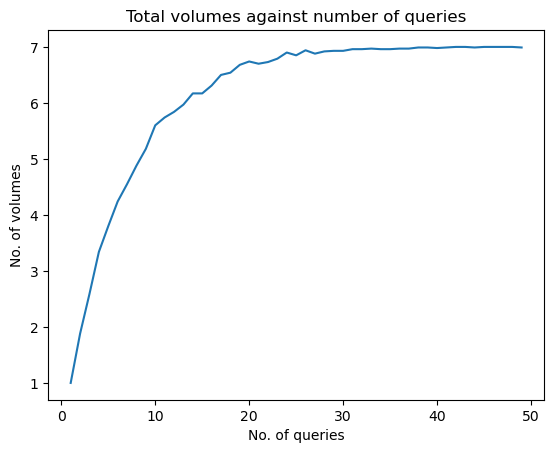

In [36]:
import random
import matplotlib.pyplot as plt
import numpy as np

H = []
EDS = {}

def node(start, end):
    global H
    if start == end:
        if (start, start) not in H:  # Avoid duplicate tuples
            H.append((start, start))
        return (start, start)
    
    mid = (start + end) // 2
    left_child = node(start, mid)
    right_child = node(mid + 1, end)
    
    # Append left_child if not already in H
    if left_child not in H:
        H.append(left_child)
    
    # Append right_child if not already in H
    if right_child not in H:
        H.append(right_child)
    
    # Combine left and right child into a new pair and append it
    combined = (left_child[0], right_child[1])
    if combined not in H:
        H.append(combined)
    
    return combined

LOGmax = 4
node(1, LOGmax)

print(H)

def const_query(num_of_qry):

    total_vols = 0

    for v in range(100):
        vol_tracker = set()
        vol_sum = 0
        for v in range(num_of_qry):
            child = random.choice(H)
        
            if child not in vol_tracker:
                vol_tracker.add(child)
                vol_sum += 1
            
            if v == num_of_qry-1:
                total_vols += vol_sum
    return total_vols / 100

x_axis = []
y_axis = []
for v in range(1, 50):
    x_axis.append(v)
    y_axis.append(const_query(v))

plt.plot(x_axis, y_axis)
plt.xlabel("No. of queries")
plt.ylabel("No. of volumes")
plt.title("Total volumes against number of queries")
plt.show()
